In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_excel('UPDOWND.xlsx')

In [3]:
# show data
df.head()

,MCD,S&P,DJ,Wendy,YUM,Starbuck,Coca,Wheat,Oil,Commodity,sugar,Volatilty,War
0,1,-0.002800,-0.000796,-0.003286,0.001337,-0.003419,0.002318,-0.020721,-0.004027,-0.004434,0.020045,-0.098962,1
1,0,-0.003055,-0.004110,-0.016694,-0.011818,-0.000441,-0.001488,0.000451,0.016371,0.014326,0.004577,0.148488,1
2,0,-0.001402,-0.007679,-0.025708,-0.002490,-0.010364,0.000331,0.014632,-0.005427,-0.001829,-0.009519,-0.523789,1
3,0,0.003237,0.006814,0.026940,0.000440,-0.010151,-0.004609,0.003211,-0.007468,0.001999,0.013321,1.119334,1
4,0,0.008904,0.010262,0.009244,-0.005681,0.011027,0.008634,-0.013575,-0.021445,0.001168,0.006007,-0.037400,1


In [4]:
# data type before transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MCD        1257 non-null   int64  
 1   S&P        1257 non-null   float64
 2   DJ         1257 non-null   float64
 3   Wendy      1257 non-null   float64
 4   YUM        1257 non-null   float64
 5   Starbuck   1257 non-null   float64
 6   Coca       1257 non-null   float64
 7   Wheat      1257 non-null   float64
 8   Oil        1257 non-null   float64
 9   Commodity  1257 non-null   float64
 10  sugar      1257 non-null   float64
 11  Volatilty  1257 non-null   float64
 12  War        1257 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 127.8 KB


In [5]:
# data transformation
df["MCD"]=df["MCD"].astype('category')

In [6]:
# data type after transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MCD        1257 non-null   category
 1   S&P        1257 non-null   float64 
 2   DJ         1257 non-null   float64 
 3   Wendy      1257 non-null   float64 
 4   YUM        1257 non-null   float64 
 5   Starbuck   1257 non-null   float64 
 6   Coca       1257 non-null   float64 
 7   Wheat      1257 non-null   float64 
 8   Oil        1257 non-null   float64 
 9   Commodity  1257 non-null   float64 
 10  sugar      1257 non-null   float64 
 11  Volatilty  1257 non-null   float64 
 12  War        1257 non-null   int64   
dtypes: category(1), float64(11), int64(1)
memory usage: 119.3 KB


In [7]:
# import library
from sklearn.model_selection import train_test_split
x = df.drop('MCD',axis=1)
y = df['MCD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
y.value_counts()

1    656
0    601
Name: MCD, dtype: int64

In [8]:
# model building
# for "max_depth", we chose 11 as we only have 12 features
dtree = DecisionTreeClassifier(max_depth = 11)

# model training
dtree.fit(x_train,y_train)

# prediction generation
y_pred = dtree.predict(x_test)

In [9]:
# print performance metrics
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[40 72]
 [41 99]]


              precision    recall  f1-score   support

           0       0.49      0.36      0.41       112
           1       0.58      0.71      0.64       140

    accuracy                           0.55       252
   macro avg       0.54      0.53      0.53       252
weighted avg       0.54      0.55      0.54       252



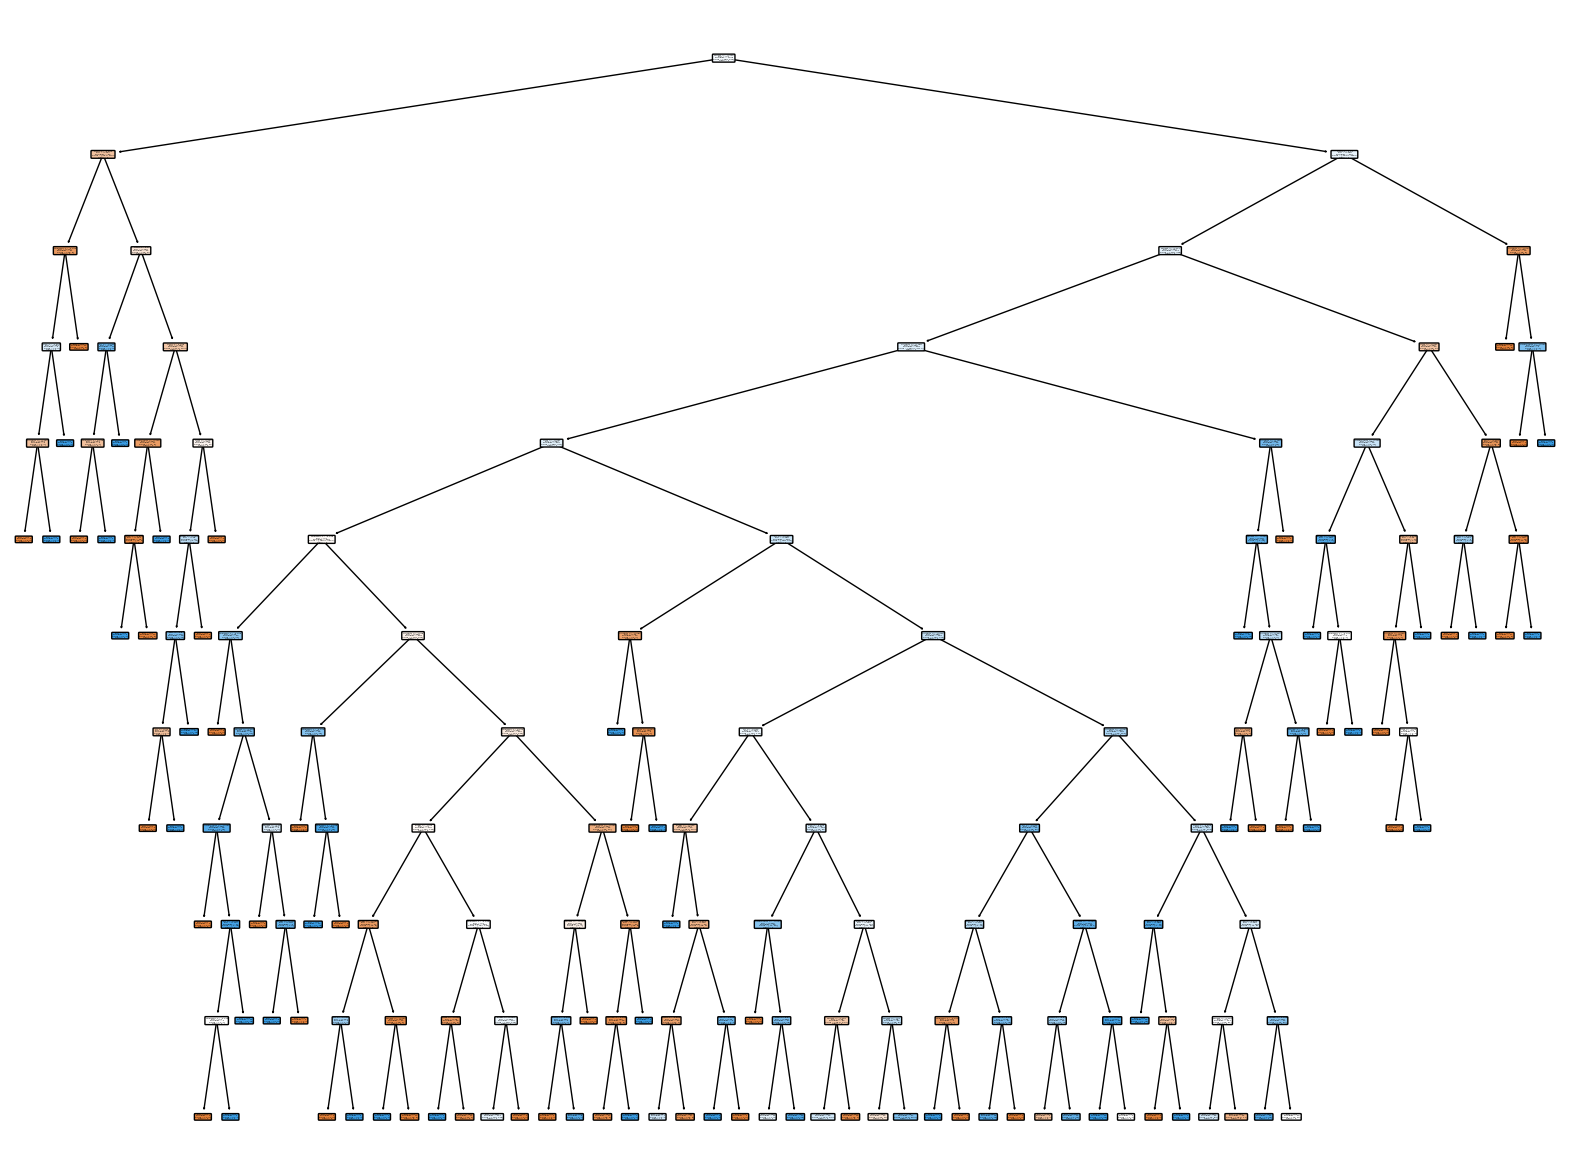

In [10]:
# class names
y.unique()

# plot decision tree
plt.figure(figsize=(20,15))

# tree characteristics
tree.plot_tree(dtree,
               feature_names = x.columns,
               class_names=["0","1"],
               rounded=True,
               filled = True);

# Try now the random forest


Text(0, 0.5, 'Testing Accuracy')

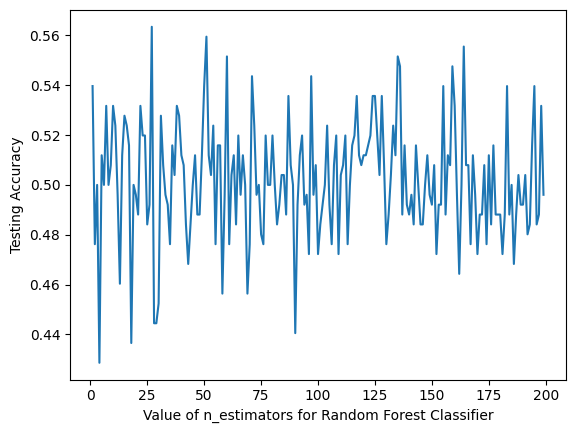

In [11]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [12]:
best_index = scores.index(max(scores))
best = range(1, 200)[best_index]

In [13]:

rf1=RandomForestClassifier(n_estimators= best, max_depth=11, random_state=0)
rf1.fit(x_train, y_train)
y_pred= rf1.predict(x_test)
y_train_pred=rf1.predict(x_train)

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[45 67]
 [63 77]]


              precision    recall  f1-score   support

           0       0.42      0.40      0.41       112
           1       0.53      0.55      0.54       140

    accuracy                           0.48       252
   macro avg       0.48      0.48      0.48       252
weighted avg       0.48      0.48      0.48       252

